In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.6k/48.6k [00:00<00:00, 28.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yasserh/breast-cancer-dataset/versions/1


In [4]:
df = pd.read_csv(f"{path}/breast-cancer.csv")

#EDA

/tmp/ipython-input-3430884048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set3')


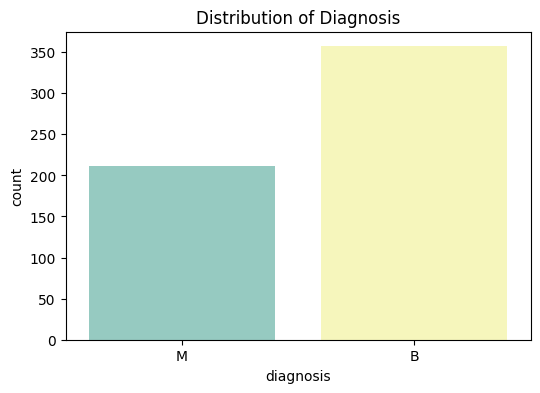

In [5]:
#1. What is the distribution of diagnosis (Malignant vs Benign)?
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=df, palette='Set3')
plt.title('Distribution of Diagnosis')
plt.show()


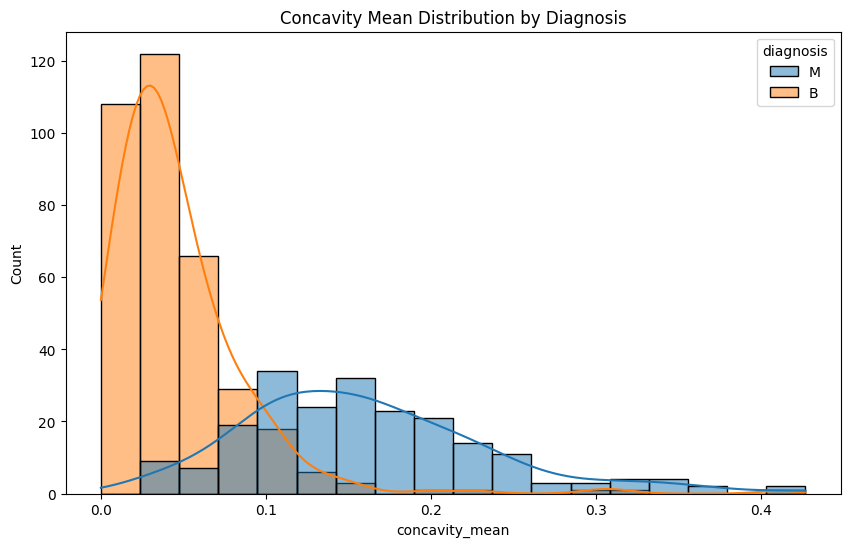

In [6]:
#2. Concavity distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='concavity_mean', hue='diagnosis', kde=True)
plt.title('Concavity Mean Distribution by Diagnosis')
plt.show()

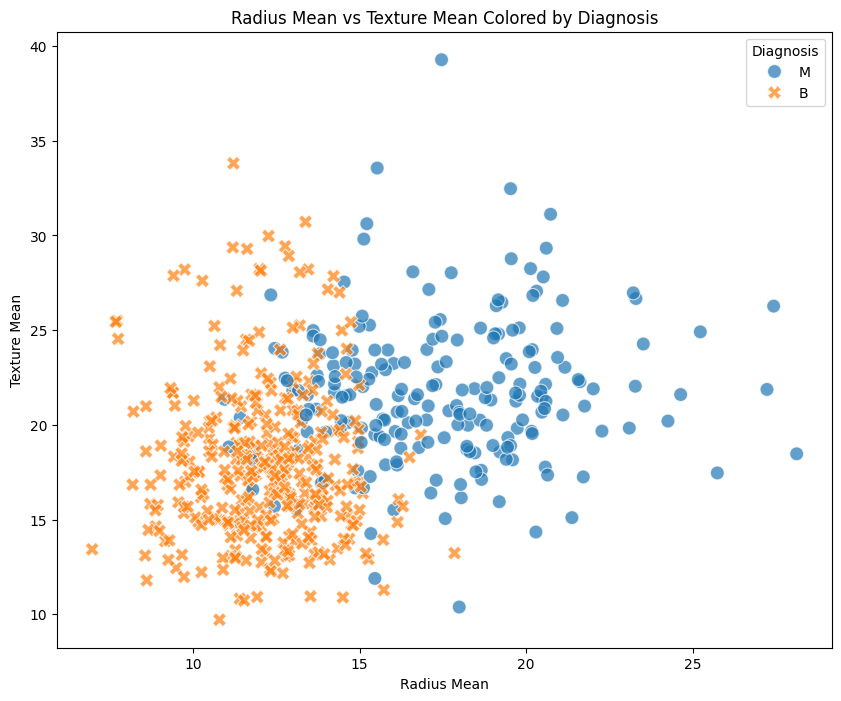

In [7]:
#3. Scatter plot radius vs texture
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis',
               style='diagnosis', s=100, alpha=0.7)
plt.title('Radius Mean vs Texture Mean Colored by Diagnosis')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.legend(title='Diagnosis')
plt.show()

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
x = df[['id', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

y = df['diagnosis']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [11]:
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
lr_model = LogisticRegression()
svm_model = SVC()

In [12]:
knn_model.fit(x_train, y_train)
nb_model.fit(x_train, y_train)
lr_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

In [13]:
y_pred_knn = knn_model.predict(x_test)
y_pred_nb = nb_model.predict(x_test)
y_pred_lr = lr_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           B       0.67      0.94      0.78        66
           M       0.82      0.38      0.51        48

    accuracy                           0.70       114
   macro avg       0.75      0.66      0.65       114
weighted avg       0.73      0.70      0.67       114

              precision    recall  f1-score   support

           B       0.57      0.97      0.72        66
           M       0.00      0.00      0.00        48

    accuracy                           0.56       114
   macro avg       0.29      0.48      0.36       114
weighted avg       0.33      0.56      0.42       114

              precision    recall  f1-score   support

           B       0.86      0.95      0.91        66
           M       0.93      0.79      0.85        48

    accuracy                           0.89       114
   macro avg       0.89      0.87      0.88       114
weighted avg       0.89      0.89      0.88       114

              preci

In [15]:
import pickle
with open('best_ml_model.pkl','wb') as f:
    pickle.dump(lr_model,f)